In [18]:
import pandas as pd
import geopandas as gpd
import pysal as ps
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import shapely.speedups
# Enable speedups to make queries faster
shapely.speedups.enable()
import glob
import re

# Exercise 4

This week we will practice how to do data classification and aggregation in Geopandas. We continue from the last week's exerise with rather similar idea.
The overall aim this week is to define *dominance areas* \[0\] for 8 shopping centers in Helsinki with different travel modes (Public tranport, private car).
The last step is to find out how many people live within the dominance areas of those big shopping centers in Helsinki Region.

*The exercise might be a rather demanding one, so don't panic, the assistants will help you and we will go through the exercise in the following week.*

\[0\]: Here, we define the dominance area of a service as the geographical area from where the given service (shopping center) is the closest one to reach in terms of travel time.

- **Exercise 4 is due by the start of lecture on 27.11**.

- Don't forget to check out the [hints for this week's exercise](https://automating-gis-processes.github.io/2017/lessons/L4/exercise-4-hints.html) if you're having trouble.

- Scores on this exercise are out of **20 points**.

## Problem 1: Join accessibility datasets into a grid and visualize them by using a classifier (6 points)

**Steps:**

 - Download a dataset from [**here**](https://github.com/Automating-GIS-processes/Lesson-4-Classification-overlay/raw/master/data/dataE4.zip) that includes 7 text files containing data about accessibility in Helsinki Region and a Shapefile that contains a Polygon grid that can be used to visualize and analyze the data spatially. The datasets are:
 
     - `travel_times_to_[XXXXXXX]_[NAME-OF-THE-CENTER].txt` including travel times and road network distances to specific shopping center
     - `MetropAccess_YKR_grid_EurefFIN.shp` including the Polygon grid with YKR_ID column that can be used to join the grid with the    accessibility data

 - Read those travel_time data files (one by one) with Pandas and select only following columns from them:
    
    - pt_r_tt
    - car_r_t
    - from_id
    - to_id
  
 

In [83]:
# Create a list of files in the data folder
listfiles = glob.glob("data/*.txt")
print(listfiles)

# Extract the number ID and create a list of them
listnumber = []
for file in listfiles:
    listnumber.append(re.findall(r'\d+', file)[0])
    
print(listnumber)

['data\\TravelTimes_to_5878070_Jumbo.txt', 'data\\TravelTimes_to_5878087_Dixi.txt', 'data\\TravelTimes_to_5902043_Myyrmanni.txt', 'data\\TravelTimes_to_5944003_Itis.txt', 'data\\TravelTimes_to_5975373_Forum.txt', 'data\\TravelTimes_to_5978593_Iso_omena.txt', 'data\\TravelTimes_to_5980260_Ruoholahti.txt']
['5878070', '5878087', '5902043', '5944003', '5975373', '5978593', '5980260']


In [163]:
df_dict = {}
fields = ["pt_r_tt", "car_r_t", "from_id", "to_id"]

# Create a dict of dataFrames and rename columns based on ID  
for file in listfiles:
    ID = listnumber[listfiles.index(file)]
    df_dict[ID] = pd.read_csv(file, sep=";")
    df_dict[ID] = df_dict[ID][fields]
    df_dict[ID] = df_dict[ID].loc[(df_dict[ID]["pt_r_tt"] >= 0) & (df_dict[ID]["car_r_t"] >=0)]
    df_dict[ID].rename(columns={"pt_r_tt": "pt_r_tt" +"_"+ str(ID), "car_r_t": "car_r_t" +"_"+ str(ID), "from_id": "from_id" +"_"+ str(ID), "to_id": "to_id" +"_"+ str(ID)}, inplace=True)

In [164]:
df_dict

{'5878070':        pt_r_tt_5878070  car_r_t_5878070  from_id_5878070  to_id_5878070
 0                  131               39          5785640        5878070
 1                  129               39          5785641        5878070
 2                  129               45          5785642        5878070
 3                  138               46          5785643        5878070
 4                  115               38          5787544        5878070
 5                  115               41          5787545        5878070
 6                  131               42          5787546        5878070
 7                  137               41          5787547        5878070
 8                  129               40          5787548        5878070
 9                  137               42          5787549        5878070
 10                 192               43          5787550        5878070
 11                  75               33          5789447        5878070
 12                  75               34

In [165]:
# Read shapefile
list_shp = glob.glob("data/*.shp")
print(list_shp)

# Create geo dataFrame
grid = gpd.read_file(list_shp[0])
print(grid.shape)
grid.head(3)

['data\\MetropAccess_YKR_grid_EurefFIN.shp']
(13231, 4)


,x,y,YKR_ID,geometry
0,381875.0,6697880.0,5785640,"POLYGON ((382000.0001388059 6697750.000128186,..."
1,382125.0,6697880.0,5785641,"POLYGON ((382250.00013875 6697750.000128181, 3..."
2,382375.0,6697880.0,5785642,"POLYGON ((382500.0001386951 6697750.000128172,..."


In [166]:
#final = gpd.GeoDataFrame()
#gdf_dict = {}

# Merge dataframes based on ID
for ID in listnumber:
    #gdf_dict[ID] = grid.merge(df_dict[ID], left_on="YKR_ID", right_on="from_id_"+ID, how="inner")
    #final.concat(merge, axis=1)
    
    grid = grid.merge(df_dict[ID], left_on="YKR_ID", right_on="from_id_"+ID,left_index=True, how="inner")
    
grid.shape
grid

,x,y,YKR_ID,geometry,pt_r_tt_5878070,car_r_t_5878070,from_id_5878070,to_id_5878070,pt_r_tt_5878087,car_r_t_5878087,...,from_id_5975373,to_id_5975373,pt_r_tt_5978593,car_r_t_5978593,from_id_5978593,to_id_5978593,pt_r_tt_5980260,car_r_t_5980260,from_id_5980260,to_id_5980260
0,381875.0,6697880.0,5785640,"POLYGON ((382000.0001388059 6697750.000128186,...",131,39,5785640,5878070,134,45,...,5785640,5975373,166,56,5785640,5978593,147,56,5785640,5980260
1,382125.0,6697880.0,5785641,"POLYGON ((382250.00013875 6697750.000128181, 3...",129,39,5785641,5878070,130,45,...,5785641,5975373,164,56,5785641,5978593,142,56,5785641,5980260
2,382375.0,6697880.0,5785642,"POLYGON ((382500.0001386951 6697750.000128172,...",129,45,5785642,5878070,130,52,...,5785642,5975373,164,64,5785642,5978593,142,63,5785642,5980260
3,382625.0,6697880.0,5785643,"POLYGON ((382750.0001386406 6697750.000128165,...",138,46,5785643,5878070,140,48,...,5785643,5975373,174,67,5785643,5978593,153,67,5785643,5980260
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000138978 6697500.000128254, ...",115,38,5787544,5878070,118,44,...,5787544,5975373,150,55,5787544,5978593,130,55,5787544,5980260
5,381375.0,6697630.0,5787545,"POLYGON ((381500.0001389222 6697500.000128247,...",115,41,5787545,5878070,118,47,...,5787545,5975373,150,58,5787545,5978593,130,58,5787545,5980260
6,381625.0,6697630.0,5787546,"POLYGON ((381750.0001388668 6697500.00012824, ...",131,42,5787546,5878070,134,49,...,5787546,5975373,166,61,5787546,5978593,147,60,5787546,5980260
7,381875.0,6697630.0,5787547,"POLYGON ((382000.0001388121 6697500.000128229,...",137,41,5787547,5878070,138,48,...,5787547,5975373,172,60,5787547,5978593,150,59,5787547,5980260
8,382125.0,6697630.0,5787548,"POLYGON ((382250.0001387566 6697500.000128225,...",129,40,5787548,5878070,130,47,...,5787548,5975373,165,59,5787548,5978593,143,58,5787548,5980260
9,382375.0,6697630.0,5787549,"POLYGON ((382500.0001387021 6697500.00012822, ...",137,42,5787549,5878070,138,49,...,5787549,5975373,172,60,5787549,5978593,150,60,5787549,5980260


In [167]:
# Create a Natural Breaks classifier
classifier = ps.Natural_Breaks.make(k=5)

# Classify data on 5878070
grid['pt_5878070_NBreak_Class'] = grid[['pt_r_tt_5878070']].apply(classifier)

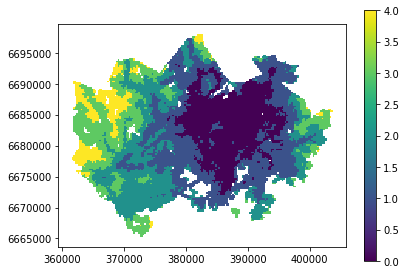

In [168]:
# Classification plot
grid.plot(column='pt_5878070_NBreak_Class', lw=0, legend=True)
plt.tight_layout()

- Visualize the **classified** travel times (Public transport AND Car) of at least one of the shopping centers using the classification methods that we went through in the [lesson materials](https://automating-gis-processes.github.io/2017/lessons/L4/reclassify.html). You need to classify the data into a new column in your GeoDataFrame. For classification, you can either:
 
    - Use the [common classifiers from pysal](https://automating-gis-processes.github.io/2017/lessons/L4/reclassify.html#classification-based-on-common-classifiers)
 
    - Or create your own [custom classifier](https://automating-gis-processes.github.io/2017/lessons/L4/reclassify.html#creating-a-custom-classifier). If you create your own, remember to document it well how it works! Write a general description of it and comment your code as well.
 
 - Upload the map(s) you have visualized into your own Exercise 4 repository (they don't need to be pretty). If visualizing takes for ever (as computer instance can be a bit slow), it is enough that you visualize only one map using plotting in Geopandas. If it is really slow, you can do the visualization also using the QuantumGIS in the computer instance or even ArcGIS in the GIS-lab.





## Problem 2: Calculate and visualize the dominance areas of shopping centers (9 points)

In this problem, the aim is to define the dominance area for each of those shopping centers based on travel time. 

How you could proceed with the given problem is: 

 - iterate over the accessibility files one by one
 - rename the travel time columns so that they can be identified 
   - you can include e.g. the `to_id` number as part of the column name (then the column name could be e.g. "pt_r_tt_5987221")
 - Join those columns into MetropAccess_YKR_grid_EurefFIN.shp where `YKR_ID` in the grid corresponds to `from_id` in the travel time data file. At the end you should have a GeoDataFrame with different columns show the travel times to different shopping centers.
 - For each row find out the **minimum** value of **all** pt_r_tt_XXXXXX columns and insert that value into a new column called `min_time_pt`. You can now also parse the `to_id` value from the column name (i.e. parse the last number-series from the column text) that had the minimum travel time value and insert that value **as a number** into a column called `dominant_service`. In this, way are able to determine the "closest" shopping center for each grid cell and visualize it either by travel times or by using the `YKR_ID` number of the shopping center (i.e. that number series that was used in column name).
 - Visualize the travel times of our `min_time_pt` column using a [common classifier from pysal](https://automating-gis-processes.github.io/2017/lessons/L4/reclassify.html#classification-based-on-common-classifiers) (you can choose which one).
 - Visualize also the values in `dominant_service` column (no need to use any specific classifier). Notice that the value should be a number. If it is still as text, you need to convert it first.
 - Upload the map(s) you have visualized into your own Exercise 4 repository (they don't need to be pretty).

In [169]:
# Extract columns
pt_cols = [col for col in grid.columns if 'pt_r_tt_' in col]
pt_cols

['pt_r_tt_5878070',
 'pt_r_tt_5878087',
 'pt_r_tt_5902043',
 'pt_r_tt_5944003',
 'pt_r_tt_5975373',
 'pt_r_tt_5978593',
 'pt_r_tt_5980260']

In [170]:
# Create min_time column
grid['min_time'] = grid.loc[:, pt_cols].min(axis=1)
grid['dominant_service'] = grid.loc[:, pt_cols].idxmin(axis=1)
grid['dominant_service'] = grid['dominant_service'].str.extract("(\d+)", expand=False).astype(int)
grid

,x,y,YKR_ID,geometry,pt_r_tt_5878070,car_r_t_5878070,from_id_5878070,to_id_5878070,pt_r_tt_5878087,car_r_t_5878087,...,car_r_t_5978593,from_id_5978593,to_id_5978593,pt_r_tt_5980260,car_r_t_5980260,from_id_5980260,to_id_5980260,pt_5878070_NBreak_Class,min_time,dominant_service
0,381875.0,6697880.0,5785640,"POLYGON ((382000.0001388059 6697750.000128186,...",131,39,5785640,5878070,134,45,...,56,5785640,5978593,147,56,5785640,5980260,4,121,5902043
1,382125.0,6697880.0,5785641,"POLYGON ((382250.00013875 6697750.000128181, 3...",129,39,5785641,5878070,130,45,...,56,5785641,5978593,142,56,5785641,5980260,4,115,5902043
2,382375.0,6697880.0,5785642,"POLYGON ((382500.0001386951 6697750.000128172,...",129,45,5785642,5878070,130,52,...,64,5785642,5978593,142,63,5785642,5980260,4,115,5902043
3,382625.0,6697880.0,5785643,"POLYGON ((382750.0001386406 6697750.000128165,...",138,46,5785643,5878070,140,48,...,67,5785643,5978593,153,67,5785643,5980260,4,126,5902043
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000138978 6697500.000128254, ...",115,38,5787544,5878070,118,44,...,55,5787544,5978593,130,55,5787544,5980260,3,103,5902043
5,381375.0,6697630.0,5787545,"POLYGON ((381500.0001389222 6697500.000128247,...",115,41,5787545,5878070,118,47,...,58,5787545,5978593,130,58,5787545,5980260,3,103,5902043
6,381625.0,6697630.0,5787546,"POLYGON ((381750.0001388668 6697500.00012824, ...",131,42,5787546,5878070,134,49,...,61,5787546,5978593,147,60,5787546,5980260,4,121,5902043
7,381875.0,6697630.0,5787547,"POLYGON ((382000.0001388121 6697500.000128229,...",137,41,5787547,5878070,138,48,...,60,5787547,5978593,150,59,5787547,5980260,4,123,5902043
8,382125.0,6697630.0,5787548,"POLYGON ((382250.0001387566 6697500.000128225,...",129,40,5787548,5878070,130,47,...,59,5787548,5978593,143,58,5787548,5980260,4,115,5902043
9,382375.0,6697630.0,5787549,"POLYGON ((382500.0001387021 6697500.00012822, ...",137,42,5787549,5878070,138,49,...,60,5787549,5978593,150,60,5787549,5980260,4,123,5902043


In [171]:
# Create a Natural Breaks classifier
classifier = ps.Natural_Breaks.make(k=5)

# Classify data on min_time
grid['min_time_NBreak_Class'] = grid[['min_time']].apply(classifier)

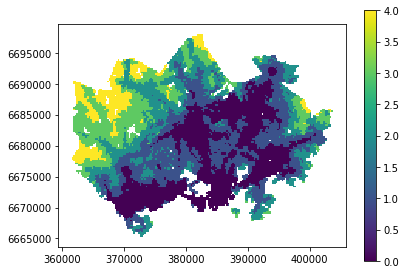

In [172]:
grid.plot(column='min_time_NBreak_Class', lw=0, legend=True)
plt.tight_layout()

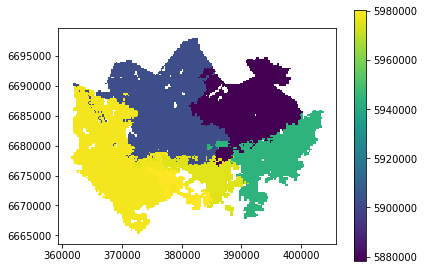

In [173]:
grid.plot(column='dominant_service', lw=0, legend=True)
plt.tight_layout()

## Problem 3: How many people live under the dominance area of each shopping center? (5 points)

Take advantage of the materials last week and find out how many people live under the dominance area of each shopping center. You should first [aggregate](file:///D:/KOODIT/Opetus/Automating-GIS-processes/AutoGIS-Sphinx/build/html/Lesson4-geometric-operations.html#aggregating-data) your dominance areas into a unified geometries using [`dissolve()`](http://geopandas.org/aggregation_with_dissolve.html#dissolve-example) -function in Geopandas. 

## Answers

Write your answers for Problem 3 here.

In [174]:
# Pending